[[ 0.94240317 -1.63384706]
 [ 0.93569894  0.16413722]
 [ 1.20045592 -1.4668384 ]
 [ 1.17035752 -0.46652055]
 [ 0.89125862  0.43246535]
 [ 2.22423958 -2.23843994]
 [ 2.57292997 -2.71823849]
 [ 1.0413823  -0.97124104]
 [ 0.14511347 -0.12858495]
 [ 1.32086011  2.62308387]
 [ 0.27206148 -0.59770121]
 [ 1.66179657  0.46633876]
 [ 2.50840802 -1.43738054]
 [ 1.2583155   0.85436382]
 [ 1.27794661 -1.46171011]
 [ 1.36840578 -0.92123314]
 [ 1.42931278 -0.13454105]
 [ 1.06766145 -1.22123539]
 [ 1.23449888  2.14972265]
 [ 0.1622826  -0.245261  ]
 [-0.32728558  0.23983977]
 [ 0.56677405  0.28286286]
 [ 1.17704846  0.93768268]
 [ 0.92283969  0.66914732]
 [ 1.65506433  1.21479977]
 [ 2.37007292 -2.28907948]
 [ 1.1171346  -0.43724881]
 [ 0.90058687 -1.53454852]
 [ 0.86521932 -0.48167512]
 [ 0.81365637 -0.57618712]
 [ 1.53246429 -1.6290073 ]
 [ 2.10755182  1.52753672]
 [ 1.62866413  1.65989048]
 [ 1.93039165 -1.17845022]
 [-0.47115034 -0.61153365]
 [-1.4211664  -0.16005723]
 [ 1.51035078 -0.89796725]
 

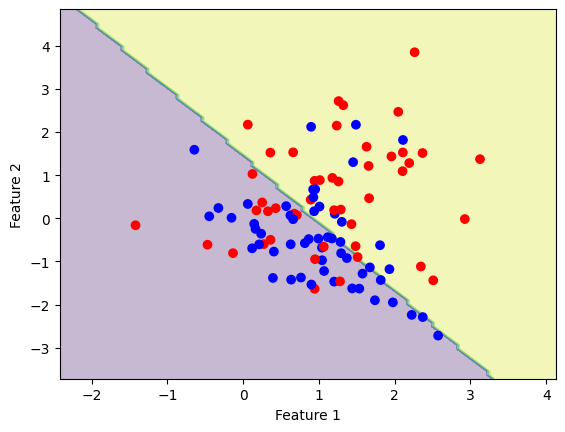

In [25]:
from sklearn.linear_model import Perceptron

'''
感知器算法scikit-learn练习
    - 对于线性可分的数据，找到一个超平面分隔类别，使得数据被分为2部分
    - 感知器算法的代价函数是期望所有预测错误的点到超平面的距离之和最小
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
'''
1.make_classification: 用于生成随机分类数据集
    参数详解：
        n_samples: 样本数量
        n_features: 总特征数
        n_informative: 有信息的特征数（真正影响分类的特征）
        n_redundant: 冗余特征数（线性组合自信息特征）
        n_clusters_per_class: 每个类别的簇数量
        n_classes: 分类类别数量
        flip_y: 标签噪声比例（制造一些错误标签）
        class_sep: 类别间距，值越大越容易分开
        random_state: 随机种子，保证结果可复现
2.train_test_split:用于将数据集随机划分为训练集和测试集两个子集
    参数详解：
        X: 特征矩阵（输入数据）
        y: 标签向量（目标数据）
        test_size: 测试集占比，通常设置为 0.2 到 0.3（即 20%-30% 的数据用于测试）
        train_size: 训练集占比，通常与 test_size 配合使用（如果没有指定，train_size 会自动计算）
        random_state: 随机种子，确保每次划分的结果相同，便于复现结果
        shuffle: 是否打乱数据，默认为 True，即随机打乱数据后划分；如果设为 False，则按照顺序划分
        stratify: 是否按照类别比例来划分数据，通常用于不平衡的数据集，确保训练集和测试集中的类别比例一致。可以传入 y。
3.Perceptron
    1. penalty (默认: 'l2')
    描述: 惩罚项，用于正则化模型，防止过拟合。可以选择：
        'l2': L2 正则化（默认）
        'l1': L1 正则化
        'elasticnet': 弹性网络正则化（结合 L1 和 L2）
        None: 不使用正则化
    2. alpha (默认: 0.0001)
        描述: 正则化强度。如果选择了正则化，alpha 控制正则化项的大小。
        增大 alpha 可以加大正则化的影响，避免过拟合。
    3. max_iter (默认: 1000)
        描述: 最大迭代次数。感知器在训练时会执行最多 max_iter 次迭代，直到满足停止条件（收敛或者达到最大迭代次数）。
    4. tol (默认: 1e-3)
        描述: 停止迭代的容忍度。训练过程中，当损失函数的变化小于 tol 时，认为模型已收敛，停止迭代。
    5. eta0 (默认: 1.0)
        描述: 学习率。控制每次更新的步长。较大的 eta0 可能使模型训练更快，但也可能导致收敛不稳定。
    6. learning_rate (默认: 'constant')
        描述: 学习率的更新策略，选项有：
        'constant': 学习率保持不变（eta0 决定学习率）
        'optimal': 自动调整学习率（根据 scikit-learn 的算法优化）
        'invscaling': 学习率随训练轮数下降，公式为：eta0 / pow(t, power_t)
        'adaptive': 学习率会在每次迭代后减少，如果当前迭代的损失没有降低，学习率会减小。
    7. early_stopping (默认: False)
        描述: 是否启用早停。启用后，当验证集的损失在若干次迭代中都没有改进时，训练会提前停止。
        需要设置 validation_fraction 和 n_iter_no_change。
    8. validation_fraction (默认: 0.1)
    描述: 训练过程中用于验证的数据占比，通常和 early_stopping 一起使用。验证集用于监控模型是否过拟合。
    9. n_iter_no_change (默认: 5)
    描述: 如果在 n_iter_no_change 次迭代中，验证集的损失没有改善，则停止训练。适用于 early_stopping。
    10. warm_start (默认: False)
    描述: 是否启用热启动。如果为 True，则训练过程中复用上一次的模型参数，继续训练，适用于多次迭代或参数调优。
    11. class_weight (默认: None)
    描述: 用于指定类别的权重。在类别不平衡时，可以加大较少类别的权重，避免模型偏向多数类。
    'balanced'：自动根据样本的频率调整权重。
    {class_label: weight}：手动指定每个类别的权重。
    12. random_state (默认: None)
    描述: 控制随机性，使得结果可复现。设定该值为整数，训练过程中的所有随机操作都将使用这个种子。
    13. shuffle (默认: True)
    描述: 是否在每次迭代前对数据进行洗牌。通常设置为 True，以避免数据按顺序引发训练偏差。
    14. verbose (默认: 0)
    描述: 是否打印训练过程中的信息。verbose=1 打印每次迭代的信息，verbose=0 则关闭。
    15. n_jobs (默认: None)
    描述: 用于设置并行计算的CPU核心数。如果为 -1，则使用所有可用核心。如果为 None，则不启用并行计算。
    16. early_stopping 和 validation_fraction（与早期停止结合使用）
    描述: 如果启用 early_stopping，则可以通过 validation_fraction 设置验证集的比例来检测过拟合并提前停止训练。

'''
x,y = make_classification(n_samples=100,n_features=2,n_classes=2,n_clusters_per_class=1,n_informative=2,n_redundant=0,flip_y=0.5,random_state=59)
print(x,y)
#将标签值转为+1和-1
y=2*y-1
print(y)

#数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=59)
print(x_train,y_train,x_test,y_test)
print("-"*100)

#初始化感知器模型
perceptron = Perceptron(max_iter=10000,random_state=59)
perceptron.fit(x_train,y_train)
print("-"*100)

#验证
y_predict=perceptron.predict(x_test)
yyp=np.c_[y_test,y_predict]
print(yyp)
print(yyp.shape)
'''
accuracy_score:用于评估分类模型的准确率
'''
accuracy=accuracy_score(y_test,y_predict)
print(accuracy)

sum_=0
for i in range(yyp.shape[0]):
    if yyp[i][0]==yyp[i][1]:
        sum_+=1
print(sum_)
print("-"*100)
'''
classification_report:提供分类模型的详细评估报告
    主要指标:
        Precision（精确率）：预测为正的样本中，实际为正的比例。
        Recall（召回率）：实际为正的样本中，预测为正的比例。
        F1-score（F1 分数）：精确率和召回率的调和平均数，综合考虑模型的精确度和覆盖度。
        Support：每个类别的样本数量。
'''
classification_report=classification_report(y_test,y_predict)
print(classification_report)

#画决策边界
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(x, y, perceptron)

